/mnt/ml-team/homes/jakub.czakon/.env/dl_py3/lib/python3.5/site-packages/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
neptune: Executing in Offline Mode.


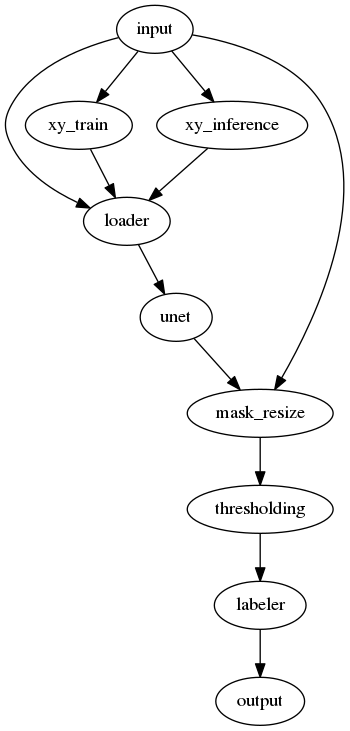

In [1]:
from pipelines import unet_train
from pipeline_config import SOLUTION_CONFIG

pipe = unet_train(SOLUTION_CONFIG)
pipe

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
masks = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_watershed_pipeline/outputs/thresholding')

In [3]:
import pandas as pd
meta = pd.read_csv('/mnt/ml-team/dsb_2018/files/stage1_metadata.csv')
meta.head()

,ImageId,file_path_image,file_path_masks,file_path_mask,is_train,width,height,n_nuclei,file_path_centers,file_path_contours
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,/mnt/ml-team/dsb_2018/data/stage1_train/000711...,/mnt/ml-team/dsb_2018/data/stage1_train/000711...,/mnt/ml-team/dsb_2018/files/masks_overlayed/st...,1,256,256,27.0,/mnt/ml-team/dsb_2018/files/centers_overlayed_...,/mnt/ml-team/dsb_2018/files/contours_overlayed...
1,003cee89357d9fe13516167fd67b609a164651b2193458...,/mnt/ml-team/dsb_2018/data/stage1_train/003cee...,/mnt/ml-team/dsb_2018/data/stage1_train/003cee...,/mnt/ml-team/dsb_2018/files/masks_overlayed/st...,1,256,256,36.0,/mnt/ml-team/dsb_2018/files/centers_overlayed_...,/mnt/ml-team/dsb_2018/files/contours_overlayed...
2,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b074...,/mnt/ml-team/dsb_2018/data/stage1_train/00ae65...,/mnt/ml-team/dsb_2018/data/stage1_train/00ae65...,/mnt/ml-team/dsb_2018/files/masks_overlayed/st...,1,320,256,70.0,/mnt/ml-team/dsb_2018/files/centers_overlayed_...,/mnt/ml-team/dsb_2018/files/contours_overlayed...
3,0121d6759c5adb290c8e828fc882f37dfaf3663ec885c6...,/mnt/ml-team/dsb_2018/data/stage1_train/0121d6...,/mnt/ml-team/dsb_2018/data/stage1_train/0121d6...,/mnt/ml-team/dsb_2018/files/masks_overlayed/st...,1,320,256,86.0,/mnt/ml-team/dsb_2018/files/centers_overlayed_...,/mnt/ml-team/dsb_2018/files/contours_overlayed...
4,01d44a26f6680c42ba94c9bc6339228579a95d0e2695b1...,/mnt/ml-team/dsb_2018/data/stage1_train/01d44a...,/mnt/ml-team/dsb_2018/data/stage1_train/01d44a...,/mnt/ml-team/dsb_2018/files/masks_overlayed/st...,1,320,256,7.0,/mnt/ml-team/dsb_2018/files/centers_overlayed_...,/mnt/ml-team/dsb_2018/files/contours_overlayed...


In [4]:
import numpy as np
from itertools import product


def random_colors(img, max_colours=1000):
    keys = list(range(1, 1000,1))
    np.random.shuffle(keys)
    values = list(range(1, 1000,1))
    np.random.shuffle(values)
    funky_dict = {k:v for k,v in zip(keys, values)}
    funky_dict[0] = 0

    h,w = img.shape
    
    for i,j in product(range(h),range(w)):
        img[i,j] = funky_dict[img[i,j]]
    return img

[[    0 64990]
 [    1    50]
 [    2   138]
 [    3    23]
 [    4    71]
 [    5   740]
 [    6   588]
 [    7   611]
 [    8   162]
 [    9   187]
 [   10   517]
 [   11   917]
 [   12   585]
 [   13   209]
 [   14   326]
 [   15   307]
 [   16   179]
 [   17   769]
 [   18   145]
 [   19    72]
 [   20   104]
 [   21   321]
 [   22   561]
 [   23   307]
 [   24   479]
 [   25   178]
 [   26   520]
 [   27   603]
 [   28   596]
 [   29    81]
 [   30   471]
 [   31  1037]
 [   32   392]
 [   33  1462]
 [   34   311]
 [   35   378]
 [   36   236]
 [   37    73]
 [   38   447]
 [   39   417]
 [   40   151]
 [   41    83]
 [   42   413]
 [   43   394]
 [   44   648]
 [   45   551]
 [   46   772]
 [   47   565]
 [   48   308]
 [   49    98]
 [   50   502]
 [   51   761]
 [   52   590]
 [   53   767]
 [   54   413]
 [   55   675]
 [   56   229]
 [   57  1278]
 [   58   236]
 [   59   145]
 [   60    81]]


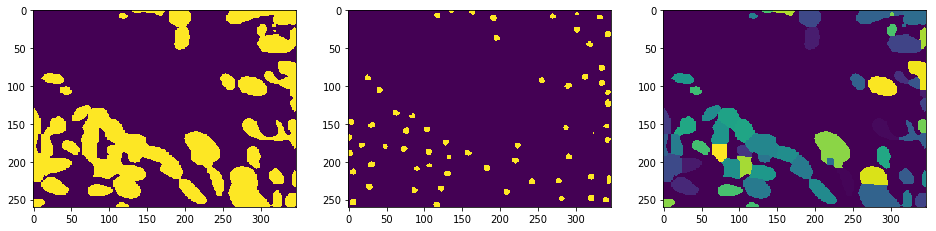

[[     0 126463]
 [     1    210]
 [     2     63]
 [     3     88]
 [     4    390]
 [     5     96]
 [     6    129]
 [     7    139]
 [     8    453]
 [     9    234]
 [    10     83]
 [    11    231]
 [    12    181]
 [    13    304]
 [    14    212]
 [    15    245]
 [    16     79]]


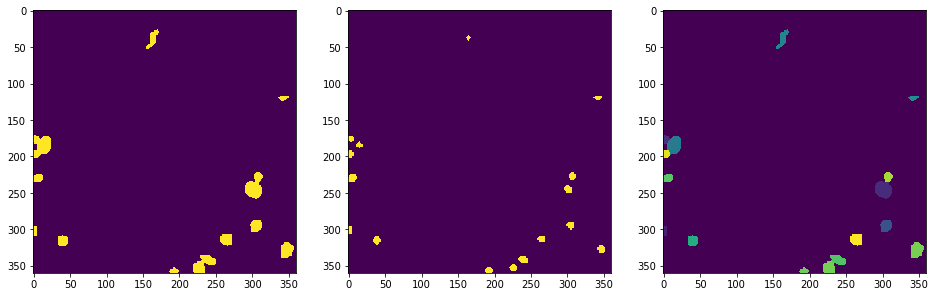

[[     0 265227]
 [     1    888]
 [     2    935]
 [     3   1135]
 [     4   2335]
 [     5   3311]
 [     6   1893]
 [     7   3661]
 [     8   2994]
 [     9   1807]
 [    10    902]
 [    11    269]
 [    12   2836]
 [    13    425]
 [    14   2679]
 [    15   4422]
 [    16   3197]
 [    17   2997]
 [    18   1272]
 [    19   2307]
 [    20   1128]
 [    21   2882]
 [    22   2954]
 [    23   2900]
 [    24   1947]
 [    25   2351]
 [    26    219]
 [    27   3067]
 [    28   2275]
 [    29    304]
 [    30   2921]
 [    31   1049]
 [    32    560]
 [    33   1695]
 [    34   3119]
 [    35   1356]
 [    36   2429]
 [    37   1793]
 [    38   2144]
 [    39   2385]
 [    40   1828]
 [    41    368]
 [    42   2906]
 [    43   2649]
 [    44   2038]
 [    45   1849]
 [    46    472]
 [    47   1743]
 [    48   1435]
 [    49   1662]]


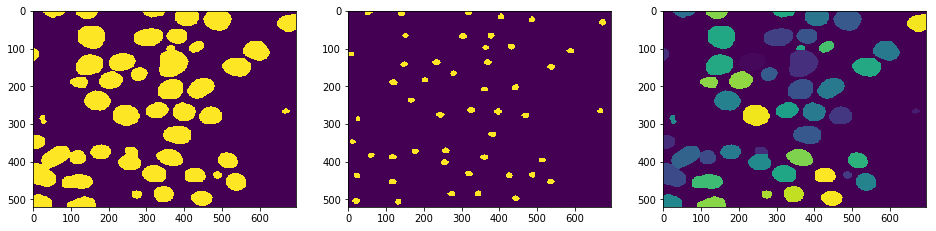

[[    0 59415]
 [    1   145]
 [    2   274]
 [    3   219]
 [    4    35]
 [    5   129]
 [    6   141]
 [    7   164]
 [    8   181]
 [    9   139]
 [   10   320]
 [   11   162]
 [   12   361]
 [   13   159]
 [   14   318]
 [   15   212]
 [   16   146]
 [   17   177]
 [   18    99]
 [   19   225]
 [   20   159]
 [   21   184]
 [   22   154]
 [   23   318]
 [   24   182]
 [   25   323]
 [   26    79]
 [   27   135]
 [   28   268]
 [   29   150]
 [   30    39]
 [   31   181]
 [   32   143]
 [   33   139]
 [   34    61]]


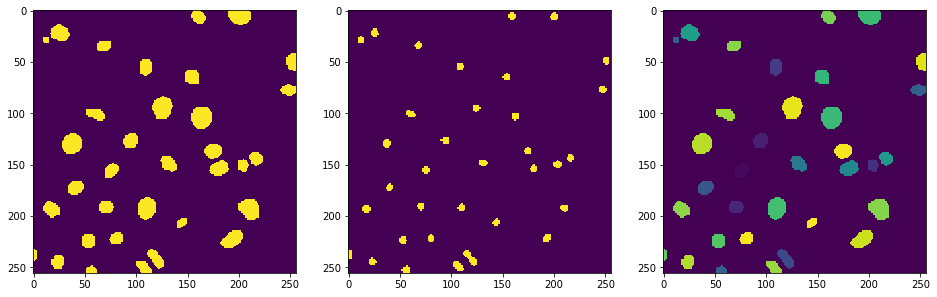

[[    0 76872]
 [    1   144]
 [    2   229]
 [    3   577]
 [    4   162]
 [    5   198]
 [    6   160]
 [    7   118]
 [    8   151]
 [    9   128]
 [   10   236]
 [   11   122]
 [   12   150]
 [   13   111]
 [   14   127]
 [   15   122]
 [   16   107]
 [   17    97]
 [   18   115]
 [   19   147]
 [   20   115]
 [   21   130]
 [   22   132]
 [   23    54]
 [   24   207]
 [   25   148]
 [   26   201]
 [   27   193]
 [   28   167]
 [   29   121]
 [   30   125]
 [   31   118]
 [   32    82]
 [   33    54]]


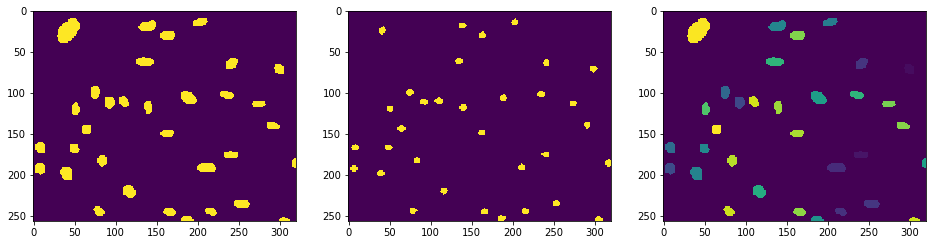

[[    0 60945]
 [    1   332]
 [    2   132]
 [    3   355]
 [    4   393]
 [    5   377]
 [    6   325]
 [    7   368]
 [    8   412]
 [    9   207]
 [   10    61]
 [   11   278]
 [   12   461]
 [   13   510]
 [   14   380]]


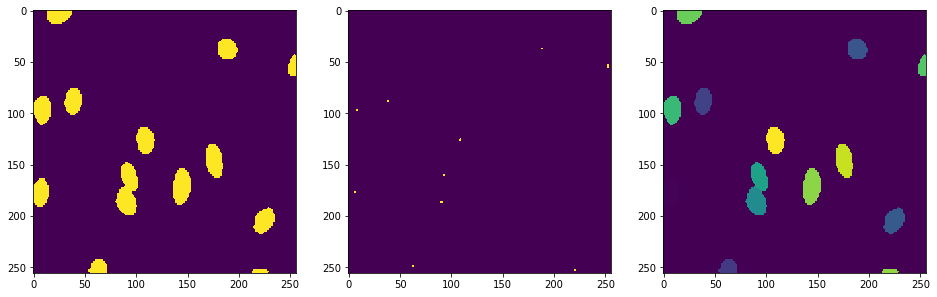

[[    0 43421]
 [    1    91]
 [    2   140]
 [    3   141]
 [    4    80]
 [    5   121]
 [    6   160]
 [    7   141]
 [    8   118]
 [    9   147]
 [   10   106]
 [   11   176]
 [   12   162]
 [   13    72]
 [   14   175]
 [   15    92]
 [   16   102]
 [   17    94]
 [   18   129]
 [   19    97]
 [   20   134]
 [   21    88]
 [   22    87]
 [   23    89]
 [   24   111]
 [   25   188]
 [   26   107]
 [   27   151]
 [   28   139]
 [   29   198]
 [   30    59]
 [   31   138]
 [   32   425]
 [   33   103]
 [   34   180]
 [   35   142]
 [   36   133]
 [   37   135]
 [   38    90]
 [   39    95]
 [   40   102]
 [   41   182]
 [   42    97]
 [   43   134]
 [   44   113]
 [   45    88]
 [   46   127]
 [   47   145]
 [   48   128]
 [   49   140]
 [   50   125]
 [   51   104]
 [   52   102]
 [   53   105]
 [   54   158]
 [   55   135]
 [   56   257]
 [   57   278]
 [   58   114]
 [   59   295]
 [   60    44]
 [   61   146]
 [   62    92]
 [   63   166]
 [   64   177]
 [   65   113]
 [   66   

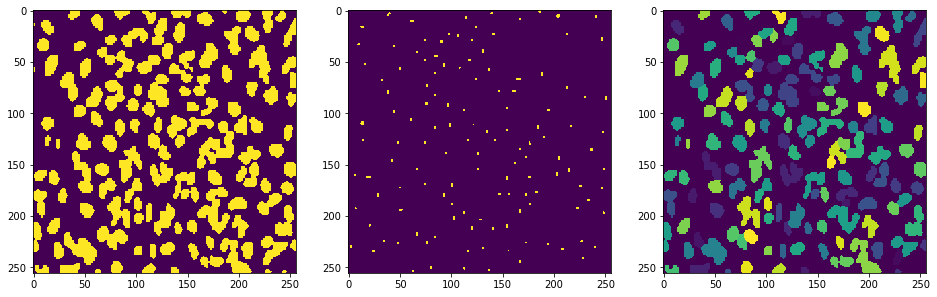

[[    0 79091]
 [    1    77]
 [    2   140]
 [    3    97]
 [    4   161]
 [    5   155]
 [    6   132]
 [    7   107]
 [    8    97]
 [    9    88]
 [   10    93]
 [   11   147]
 [   12   138]
 [   13   132]
 [   14   154]
 [   15   139]
 [   16   141]
 [   17   131]
 [   18   103]
 [   19   123]
 [   20   142]
 [   21   151]
 [   22   135]
 [   23    46]]


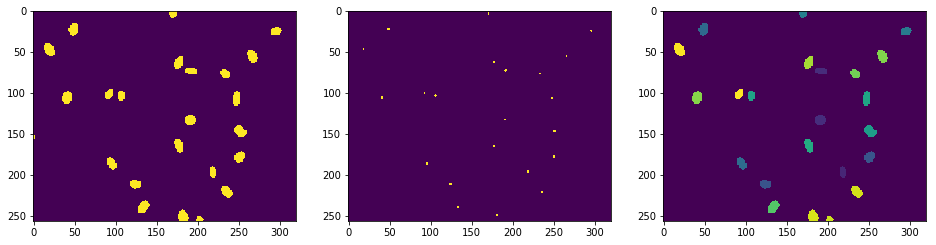

[[    0 49022]
 [    1   490]
 [    2   527]
 [    3  1113]
 [    4  1095]
 [    5   893]
 [    6   851]
 [    7  1292]
 [    8   102]
 [    9   968]
 [   10  1038]
 [   11   896]
 [   12   393]
 [   13  1204]
 [   14  1535]
 [   15   184]
 [   16   896]
 [   17  1043]
 [   18  1234]
 [   19   327]
 [   20   433]]


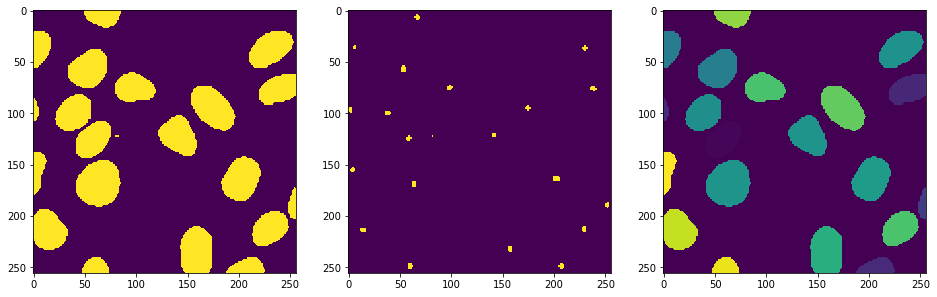

[[     0 514767]
 [     1  14399]
 [     2  10062]
 [     3  13340]
 [     4  13843]
 [     5  17880]
 [     6  12466]
 [     7  12059]
 [     8  16524]
 [     9   7650]
 [    10  10256]
 [    11  15422]
 [    12   8924]
 [    13  13910]
 [    14   9909]
 [    15  13322]
 [    16   9887]
 [    17   6741]
 [    18    583]
 [    19   9529]
 [    20  17439]
 [    21   9424]
 [    22   6995]
 [    23   1685]]


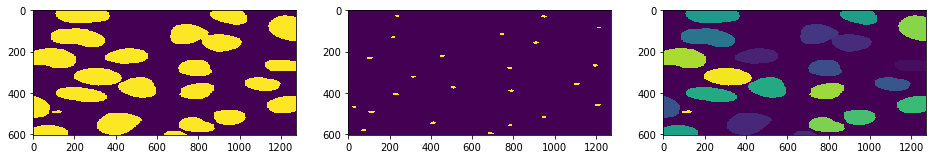

In [20]:
def relabel(img):
    h,w = img.shape

    unique_vals = np.unique(img)
    relabel_dict = {}
    
    for i,k in enumerate(np.unique(img)):
        if k ==0:
            relabel_dict[k] = 0
        else:
            relabel_dict[k] = i
    for i,j in product(range(h), range(w)):
        img[i,j] = relabel_dict[img[i,j]]
    return img

def drop_smaller(img):
    k = 20
    
    freqs = itemfreq(img)
    small_blob_id = freqs[freqs[:,1]<k,0]
    
    h,w = img.shape
    for i,j in product(range(h), range(w)):
        if img[i,j] in small_blob_id:
            img[i,j] = 0
    return img

from scipy.stats import itemfreq
mask_threshold = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_tripled_dev/outputs/mask_thresholding')

center_thresholding = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_tripled_dev/outputs/center_thresholding')

watershed = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_tripled_dev/outputs/watershed')

for idx in range(10):
    m = mask_threshold['binarized_images'][idx]
    c = center_thresholding['binarized_images'][idx]
    w = watershed['detached_images'][idx]
    w = drop_smaller(w)
    print(itemfreq(relabel(w)))
    plt.figure(figsize=(16,12))
    plt.subplot(131)
    plt.imshow(m)
    plt.subplot(132)
    plt.imshow(c) 
    plt.subplot(133)
    plt.imshow(random_colors(w))      
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2
from scipy import ndimage as ndi
from sklearn.externals import joblib
from skimage.transform import resize
import skimage.morphology as morph

def detach_nuclei(image, center):
    distance = ndi.distance_transform_edt(image)   
    markers, nr_blobs = ndi.label(center)
    labeled = morph.watershed(-distance, markers, mask=image)

    dropped, _ = ndi.label(image - (labeled > 0))
    dropped = np.where(dropped > 0, dropped + nr_blobs, 0)

    correct_labeled = dropped + labeled
    return correct_labeled

res = detach_nuclei(mask_threshold, center_thresholding)

plt.figure(figsize=(20,16))
plt.subplot(131)
plt.imshow(mask_threshold)
plt.subplot(132)
plt.imshow(center_thresholding) 
plt.subplot(133)
plt.imshow(res)      
plt.show()

In [ ]:
outputs = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_tripled_dev/outputs/unet_multitask')
plt.figure(figsize=(16,12))
for i,(name, output) in enumerate(outputs.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(output[0])  
plt.show()

In [ ]:
from scipy.stats import itemfreq
itemfreq(contour)